# Data Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
import seaborn
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./star_classification.csv')
df.head(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [4]:
df['class'].replace('GALAXY',0,inplace=True)
df['class'].replace('STAR',1,inplace=True)
df['class'].replace('QSO',2,inplace=True)
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842


In [5]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [115]:
X = df[['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID']].values  #.astype(float)
y = df['class'].values
X.shape

(100000, 17)

# Feature Selection

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


<AxesSubplot:>

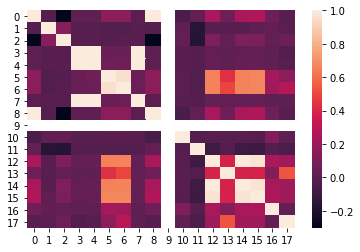

In [116]:
corr=np.corrcoef(X,y,rowvar=False)
seaborn.heatmap(corr)

Column number 9 in correlation matrix is null. columns 0 & 8 as well as well 12 & 14 are exactly the same, meaning they are solid ration of one another. Thus, we will eliminate columns 9,8,12

In [117]:
X = df[['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z',
       'cam_col', 'field_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID']].values  #.astype(float)
X.shape

(100000, 14)

<AxesSubplot:>

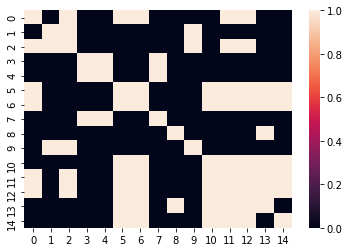

In [118]:
corr=np.corrcoef(X,y,rowvar=False)
seaborn.heatmap(abs(corr)>0.1)

In [119]:
X = df[['r', 'i', 'redshift', 'plate', 'MJD',]]
X.shape

(100000, 5)

In [120]:
X_train_cv,X_test,y_train_cv,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
X_train,X_cv,y_train,y_cv=train_test_split(X_train_cv,y_train_cv,test_size=0.2,random_state=4)

# K Nearest Neighbors

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [124]:
yhat = neigh.predict(X_cv)
yhat[0:5]
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Cross Validation set Accuracy: ", metrics.accuracy_score(y_cv, yhat))

Train set Accuracy:  0.837453125
Cross Validation set Accuracy:  0.77875


#### find the best k value using cross validation set.

In [66]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_cv)
    mean_acc[n-1] = metrics.accuracy_score(y_cv, yhat)

    
    std_acc[n-1]=np.std(yhat==y_cv)/np.sqrt(yhat.shape[0])

mean_acc

array([0.8199375, 0.7960625, 0.80225  , 0.782875 , 0.77875  , 0.768875 ,
       0.7665   , 0.758    , 0.7569375])

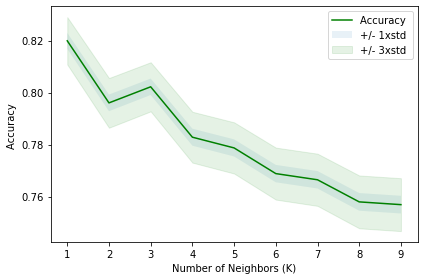

In [67]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [126]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=1)

In [127]:
yhat = neigh.predict(X_test)
yhat[0:5]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.8209


# Decision Trees

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt


starTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
starTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [77]:
starTree.fit(X_train,y_train)
predTree = starTree.predict(X_cv)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_cv, predTree))

DecisionTrees's Accuracy:  0.9574375


### find the best max_depth using cross validation set.

In [80]:
ds=10
for i in range(1,ds):
    starTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    starTree.fit(X_train,y_train)
    predTree = starTree.predict(X_cv)
    print("DecisionTrees's Accuracy on CV set: ", metrics.accuracy_score(y_cv, predTree))

DecisionTrees's Accuracy:  0.8094375
DecisionTrees's Accuracy:  0.949
DecisionTrees's Accuracy:  0.9525625
DecisionTrees's Accuracy:  0.9574375
DecisionTrees's Accuracy:  0.9615625
DecisionTrees's Accuracy:  0.9641875
DecisionTrees's Accuracy:  0.9681875
DecisionTrees's Accuracy:  0.9689375
DecisionTrees's Accuracy:  0.9715


In [82]:
starTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
starTree.fit(X_train,y_train)
predTree = starTree.predict(X_test)
print("DecisionTrees's Accuracy on test set: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy on test set:  0.969


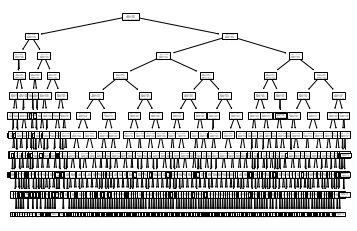

In [83]:
tree.plot_tree(starTree)
plt.show()

# Regression

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(solver="newton-cg",fit_intercept=True,C=0.1,max_iter=100).fit(X_train,y_train)
LR

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


LogisticRegression(C=0.1, solver='newton-cg')

In [142]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 2, 0], dtype=int64)

In [144]:
yhat_prob = LR.predict_proba(X_cv)
yh=np.argmax(yhat_prob,axis=1)
print("Regression's Accuracy: ", metrics.accuracy_score(y_cv, yh))

Regression's Accuracy:  0.924625
